# Mapping

###### Equipe pédagogique : P. François, M. Genete, C. Toffano-Nioche, E. Jacquemet, G. Le Corguillé, J. Seiler, D. Puthier, T. Denecker et tout le staff

## Nettoyer ses données 

Nous avons dorénavant une vue d'ensemble de nos données. 

La présence d'adaptateurs, ou de bases de moins bonne qualité en fin de lecture, nous encourage à "rogner" leurs extrémités. <br>
Cette étape est appelée __"trimming"__.

L'objectif du trimming sera donc d'apporter une meilleure confiance dans les données et permettre la meilleure exploitation possible de celles-ci. En effet, il existe un risque de ne pas pouvoir aligner correctement nos lectures si leur extrémités ne sont pas bien lues ou ne correspondent pas à du vrai matériel génétique.

#### Etape 1 
Ce nettoyage va donc commencer par une identification des adaptateurs.


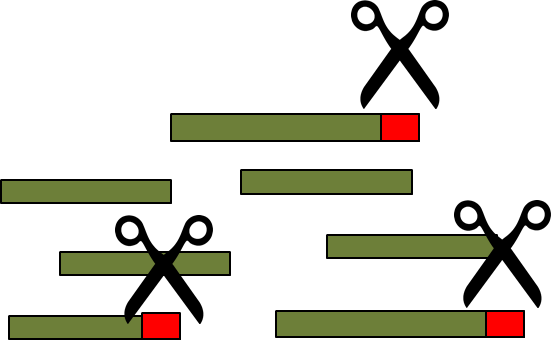

Généralement, les outils de trimming possèdent une liste de séquences d’adaptateurs de référence pour les identifier et les couper.

Cela n'est vrai que si l’insert d’ADN est plus court que la taille de la lecture.

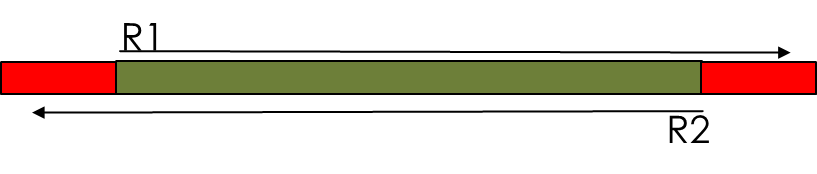

#### Etape 2

Selon les outils, certains vont scanner la séquence en partant de son extrémité 5'. Il est défini une fenêtre coulissante dont la qualité moyenne est calculée. Lorsque cette dernière est inférieure à une valeur fixée, l'extrémité 3' est délétée.

D'autres couperont simplement un nombre de nucléotides défini si leur qualité moyenne est inférieure à une valeur seuil.

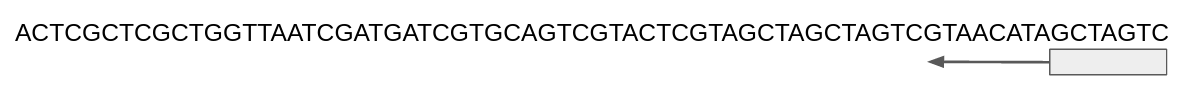

#### Etape 3 

Selon leur taille, les reads de taille inférieure à une valeur seuil sont supprimés.

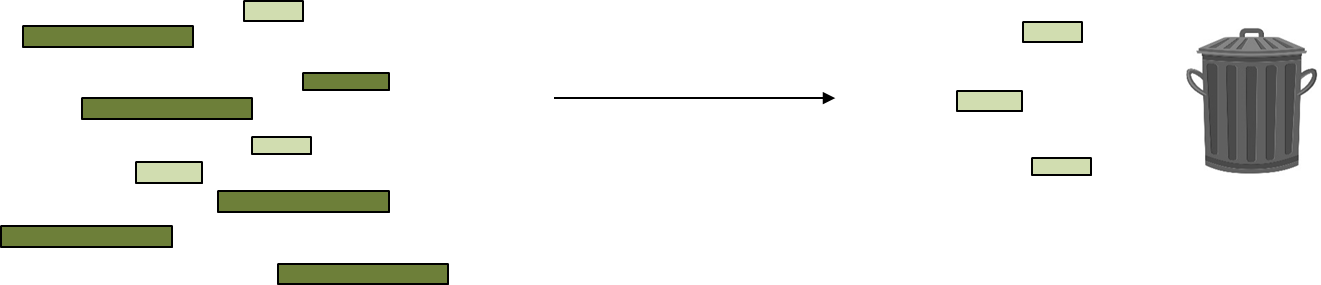

Il existe de nombreux outils, leur usage peut dépendre du type de nettoyage que vos données nécessitent. Parmi les plus utilisés et à connaitre, on retrouve :

- Sickle-trim 
- FASTX-Toolkit
- Trimmomatic
- Cutadapt
- Fastp


## Le mapping, qu'est ce que c'est ?

Maintenant que nos données sont bien propres, nous arrivons à l'étape qui concernera aussi bien le RNA-seq que le chip-seq ou encore le variant calling. Seul variera l'outil !

Le mapping, **cartographie** en français, consiste à positionner chaque lecture sur un génome de référence afin de savoir quelle région du génome l'a produite.

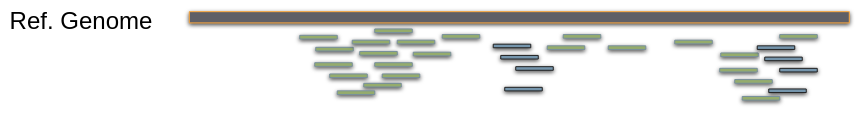

Le fichier de référence est au format fasta.

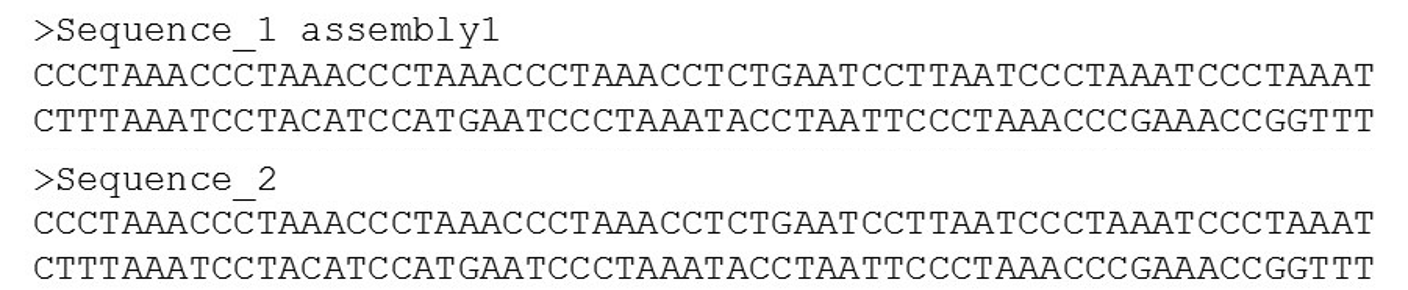

## L'index du génome de référence

Un génome de référence, selon l'espèce, représente souvent bien plus de 1 million de bases. Impossible de le parcourir à chaque fois que l'on veut aligner un de nos million de reads. 

C'est pourquoi, avant tout alignement, il est important de créer un index de notre génome. 

Attention, chaque outil (et chaque version) a le sien. Il faut donc autant d'index que de mappeurs que vous souhaitez tester/utiliser.

L'idée de fond reste cependant assez similaire puisqu'il s'agit de créer une liste de petits fragments de génome avec les positions associées, exactement comme l'index d'un livre.

Grâce à lui, votre outil saura par exemple que le motif AAGTC est présent sur le chromosome 22 à la position 399 et le chromosome 3 position 20.

## Parlons algorithme

Par chance pour nous, la majorité des aligneurs utilise le principe du **seed-and-extend** qui est plutôt intuitif.

Voici un génome de référence

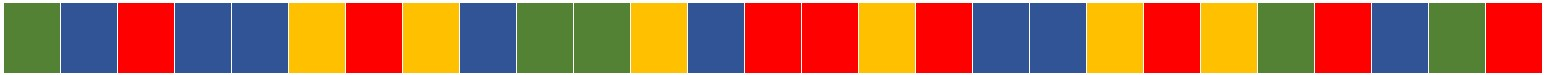

Voici un read. Comment procédez-vous pour le placer ?

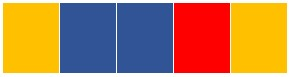

Assez naturellement on tente de positionner la première couleur,

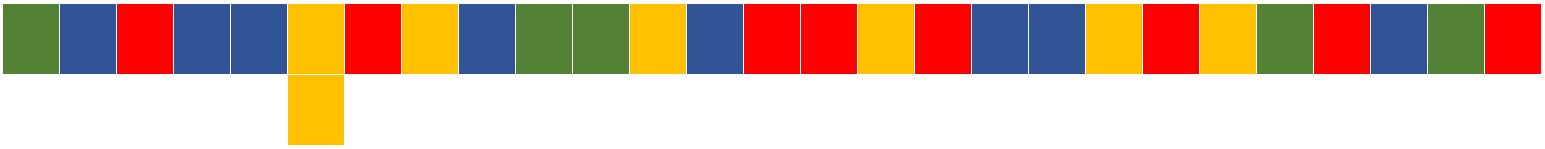

Puis la seconde...

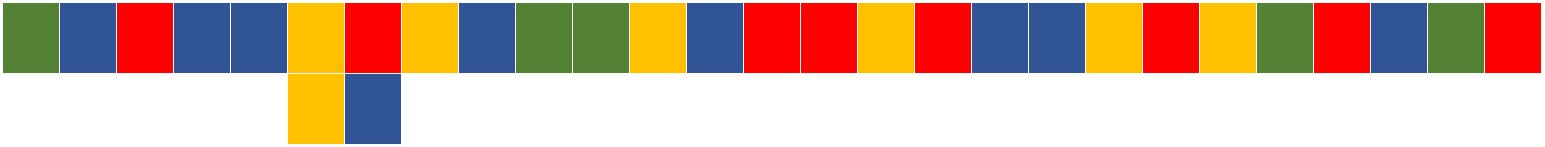

Si cela ne matche pas

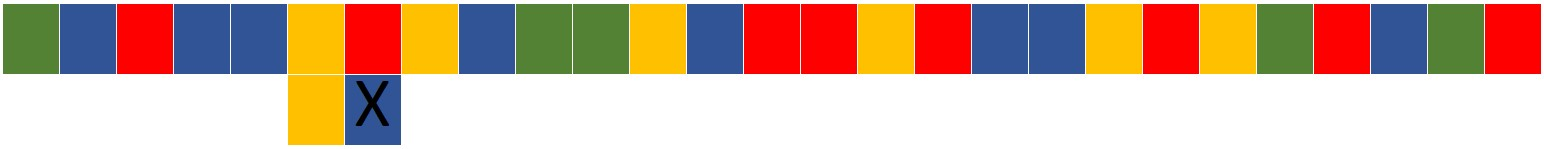

On changera alors de position mais on ne les parcourera pas toutes, on ira directement à la case jaune suivante. C'est cette couleur qui sera votre "seed" ou graine, c'est-à-dire une courte séquence que vous allez consulter en priorité.

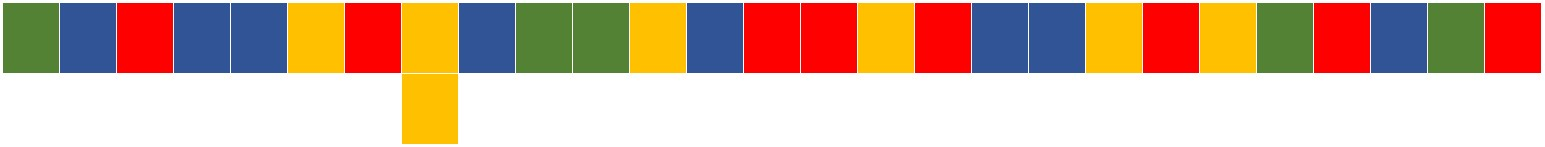



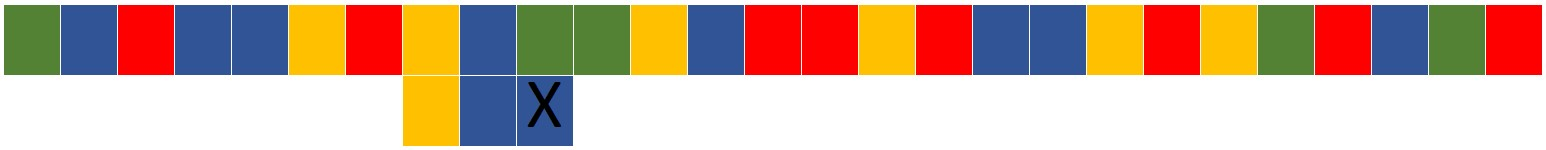



Et ainsi de suite. Chaque test consistant à ajouter les bases qui suivent votre graine sont des extensions ou "extend" de notre fameux algorithme "seed-and-extend".

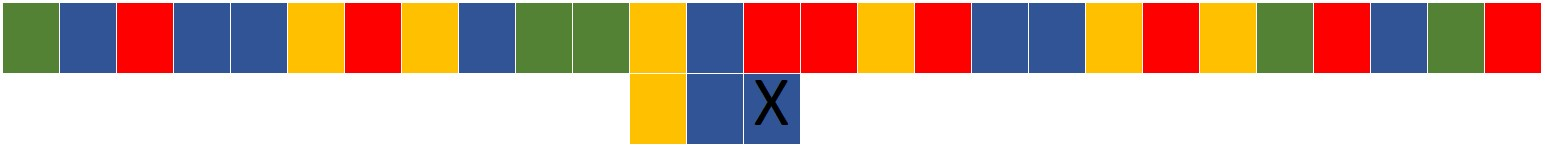

Si aucune position n'est identifiée, on refera la même chose dans l'autre sens, jusqu'à trouver un ou plusieurs matchs possibles et de bonne qualité.


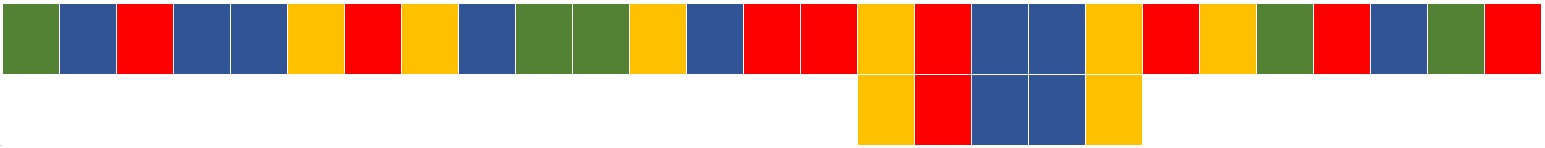

Nos outils utiliseront le même procédé. Grâce à l'index, ils possèdent l'information des positions où commencer (seed) puis essayer d'étendre la séquence du read tant qu'il existe une correspondance (extend).

Pour finir sur les algorithmes, il faut voir que la majorité des outils recherche des alignements dit **end-to-end**. Les autres sont dits **local** (pour l'anglais) ou partiel.

En d'autres termes, l'alignement end-to-end est considéré comme une méthode d'alignement plus stricte que les alignements partiels. En mode partiel, les bases peuvent être coupées à partir de l'extrémité 5' ou 3' d'une lecture pour obtenir le meilleur alignement possible, là où le end-to-end préfèrera ajouter quelques indels ou snp.

## Choisir son outil d'alignement

Les outils sont nombreux. Nous n'utiliserons pas les mêmes selon :<br>
- le type de séquençage, 
- la taille de lectures, 
- l'organisme étudié.

- Pour les *procaryotes*, en *short-reads*, ou les *eucaryotes peu décrits/annotés*, **Bowtie2** et **bwa** sont les plus plébicités.
- Pour les *eucaryotes*, en *short-reads*, (besoin de gérer les introns) on utilise d'avantage **Hisat2** et **STAR**.
- Pour les *long-reads*, on partira plutôt sur **Minimap2**.
- Pour les *reads très courts* (mi-RNA par exemple), plutôt **BWA** ou **Bowtie**.


##### Attention, ce sont des exemples et non des vérités absolues et exhaustives.

L'article suivant bien que datant de 2012 vous donnera une vue plus exhaustive de ce qui existe : https://academic.oup.com/bioinformatics/article/28/24/3169/245777

## Le fichier SAM/BAM

Le format de fichier standard d'un mapping est le format **SAM** (_Sequence Alignment/MAP_) et sa version compressée en binaire, le **BAM**. 

Ce format stocke :
- Les coordonées de la lecture alignée (en base 1)
- La qualité de l'alignement
- Le CIGAR string
- Le bitwise FLAG

Voici un exemple de fichier SAM :

    SRR540192.9292201       0       chr21   5086758 31      37M     *       0       0       CCCGCTTCATGCCTGCCATCCTTGGCATCCCTACTTA   
    IIIIIIIIIIIIIIFIIIIIIIIIIGIHIIIHDIIIG   AS:i:0       XS:i:-5 XN:i:0  XM:i:0  XO:i:0  XG:i:0  NM:i:0  MD:Z:37 YT:Z:UU
    
    SRR540192.8913064       0       chr21   5107214 31      37M     *       0       0       TTGAGGCCAGGCACCCAGTCCTGGTCGTCCGGGTCCA   IIHIIIIIIIGGIIIIIIIIIIIIHIHHIIGGG@GGG   AS:i:0       XS:i:-5 XN:i:0  XM:i:0  XO:i:0  XG:i:0  NM:i:0  MD:Z:37 YT:Z:UU
    
    SRR540192.26930625      0       chr21   5107214 31      37M     *       0       0       TTGAGGCCAGGCACCCAGTCCTGGTCGTCCGGGTCCA   GIIIIIHIIIIHIIIIIHIIHIIHHIGBIIGGGEGGG   AS:i:0       XS:i:-5 XN:i:0  XM:i:0  XO:i:0  XG:i:0  NM:i:0  MD:Z:37 YT:Z:UU
    
    SRR540192.4618335       16      chr21   5107214 31      37M     *       0       0       TTGAGGCCAGGCACCCAGTCCTGGTCGTCCGGGTCCA   GHH@FGGEHHEHHHHHHHHGEDHHHHHHHHHHHBHHH   AS:i:0       XS:i:-5 XN:i:0  XM:i:0  XO:i:0  XG:i:0  NM:i:0  MD:Z:37 YT:Z:UU
    
    SRR540192.18776687      0       chr21   5107215 31      37M     *       0       0       TGAGGCCAGGCACCCAGTCCTGGTCGTCCGGGTCCAC   HIHIIFIIIIBIIIIIIBIIHHHEIIIIIIII<IIII   AS:i:0       XS:i:-6 XN:i:0  XM:i:0  XO:i:0  XG:i:0  NM:i:0  MD:Z:37 YT:Z:UU


Pour une meilleure lisibilité, mettons la première ligne dans un tableau.

|QNAME|FLAG|RNAME|POS|MAPQ|CIGAR|RNEXT|PNEXT|TLEN|SEQ|QUAL|TAG:TYPE:VALUE|
|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|
|SRR540192.9292201|0|chr21|5086758|31|37M|\*|0|0|CCCGCTTCATGCCTGCCATCCTTGGCATCCCTACTTA|IIIIIIIIIIIIIIFIIIIIIIIIIGIHIIIHDIIIG|AS:i:0 XS:i:-5 XN:i:0 XM:i:0 XO:i:0 XG:i:0 NM:i:0 MD:Z:37 YT:Z:UU|

- QNAME : Identifiant du read
- FLAG : Combinaison binaire de flags (nous y reviendrons)
- RNAME : Nom de la référence (chromosome ou contig)
- POS : Position de la première base du read sur la référence (base 1)
- MAPQ : Qualité moyenne de mapping. Le maximum est de 254, une valeur de 255 est synonyme de non disponibilité de la valeur
- CIGAR : Combinaison de chiffres et de lettres pour indiquer la façon dont le read se mappe (nous y reviendrons)
- RNEXT : Nom de la référence où se mappe la paire correspondant à notre read
- PNEXT : Position où se mappe la paire correspondant à notre read
- TLEN : Distance entre la position la plus à gauche et la plus à droite de notre paire
- SEQ : Sequence du read
- QUAL : Valeur ASCII de qualité par base issue du fichier fastQ
- TAG:TYPE:VALUE : Dépendant de chaque outil d'alignement

## CIGAR

Le CIGAR (Concise Idiosyncratic Gapped Alignment Report) permet de compacter les informations représentant le mapping du read sur la séquence de référence.

Les lettres pouvant être (majoritairement) retrouvées sont :

- M : Match ou mismatch sur la séquence
- I : Insertion de bases par rapport à la référence
- D : Délétion de bases par rapport à la référence
- N : Présence de gap dans l'alignement

Ainsi, pour l'alignement suivant :

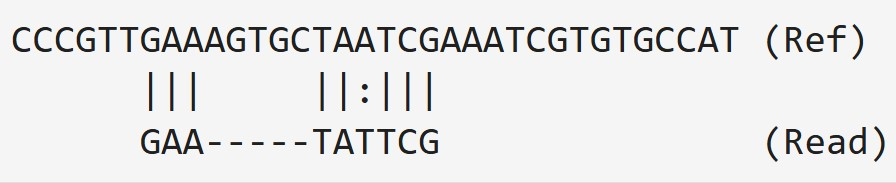

On obtient le CIGAR suivant <code>3M5N6M</code>

## Bitwise flag

Ce flag permet de savoir (vous comme les outils) quels reads filtrer ou non.

En effet, chaque nombre est une combinaison binaire dont la correspondance se trouve sur ce site : https://broadinstitute.github.io/picard/explain-flags.html

A quoi correspond un flag de 4 ?

Conclusion : Le read n'est pas mappé

## MapQ

Comme pour les scores de qualité des fichiers fastQ, il s'agit d'un score Phred. Il donne la probabilité que le read ne soit pas aligné convenablement.

Cette qualité est une combinaison de facteurs :
- Le nombre de fois où le read s'aligne sur la référence
- La qualité des bases du read 
- La sensibilité de l'algorithme utilisé (outil dépendant)
- Le read est pairé ou non